In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
data=pd.read_csv('bank.csv')

### Initial analysis of the data

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
data.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
data.shape

(11162, 17)

In [8]:
data.isnull() .sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# we use value_counts() to display how many instances are present in the categorical feature/class variable
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('bank.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit    0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
data.job = lbe.fit_transform(data.job)
data.marital = lbe.fit_transform(data.marital)
data.education = lbe.fit_transform(data.education)
data.default = lbe.fit_transform(data.default)
data.housing = lbe.fit_transform(data.housing)
data.loan = lbe.fit_transform(data.loan)
data.contact = lbe.fit_transform(data.contact)
data.month = lbe.fit_transform(data.month)
data.poutcome=lbe.fit_transform(data.poutcome)
data.deposit=lbe.fit_transform(data.deposit)

In [13]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1


### Splitting

In [14]:
y = data['deposit']
X = data.drop('deposit',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [15]:
results = []
names = []
models=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,RandomForestClassifier,AdaBoostClassifier,LGBMClassifier]
def compML(data,algorithm):
    model=algorithm().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    model_name=algorithm.__name__
    results.append(accuracy)
    names.append(model_name)
    print(model_name,"-> The accuracy of the model:",accuracy)
for i in models:
    compML(data,i)

LogisticRegression -> The accuracy of the model: 0.7653381101656964
DecisionTreeClassifier -> The accuracy of the model: 0.7917599641737573
KNeighborsClassifier -> The accuracy of the model: 0.7487684729064039
SVC -> The accuracy of the model: 0.7474249888042992
RandomForestClassifier -> The accuracy of the model: 0.8481862964621585
AdaBoostClassifier -> The accuracy of the model: 0.8231079265562025
LGBMClassifier -> The accuracy of the model: 0.8652037617554859


#### Comparison of the models

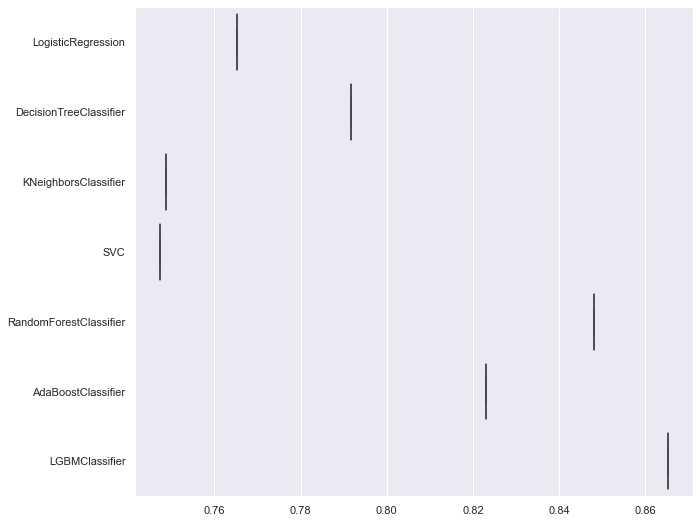

In [16]:
sns.set(rc={'figure.figsize':(10,9)})
sns.boxplot(results,names);

##### LGBMClassifier ve Random Forest algorithms are the best options for our dataset.

###### Model Tuning

Accuracy rates were obtained without any changes in parameters. In this section we will try to optimize accuracy rates using model tuning methods.
**LGBMClassifier Model Tuning**

In [17]:
lgbmc_params={'n_estimators':[100,500],
              'subsample':[0.6,0.8,1.0],
              'max_depth':[3,4,5],
              'learning_rate':[0.1,0.01,0.05],
              'min_child_samples':[5,10,20]}

In [18]:
lgbmc=LGBMClassifier()
lgbmc_cv_model=GridSearchCV(lgbmc,lgbmc_params,cv=5,n_jobs=-1,verbose=10)

In [25]:
lgbmc_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=10)

In [26]:
#Best params can be obtained from following code
lgbmc_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [27]:
lgbmc_tuned=LGBMClassifier(learning_rate= 0.1, max_depth= 5, min_child_samples= 5, n_estimators= 100, subsample= 0.6)

In [28]:
lgbmc_tuned=lgbmc.fit(X_train,y_train)
y_pred=lgbmc_tuned.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy :  0.8652037617554859
Confusion Matrix : 
 [[982 193]
 [108 950]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1175
           1       0.83      0.90      0.86      1058

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



**Random Forest Model Tuning**

In [29]:
rf_params={'n_estimators':[10,500,1000],
           'max_depth':[2,5,8],
           'max_features':[2,5,8],
           'min_samples_split':[2,5,10]}

In [30]:
rf=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf,rf_params,cv=5,n_jobs=-1,verbose=10)

In [31]:
rf_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=10)

In [37]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [38]:
rf_tuned=LGBMClassifier(n_estimators=1000 , max_depth=8, max_features=8 , min_samples_split=10)

In [39]:
rf_tuned=rf.fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy :  0.8437080161218092
Confusion Matrix : 
 [[970 205]
 [144 914]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1175
           1       0.82      0.86      0.84      1058

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.85      0.84      0.84      2233



##### Random forest algorithm might be a good option for our dataset, but this model takes more time compared to LGBM.

### Best features

**LGBMClassifier Best Features**

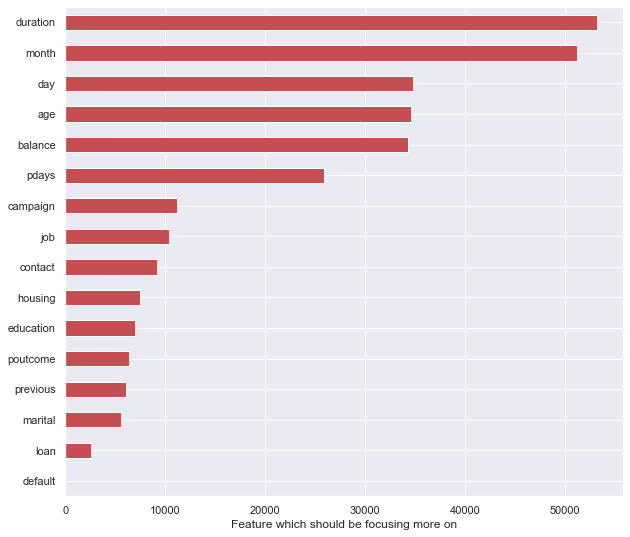

In [40]:
Importance=pd.DataFrame({'Importance':lgbmc_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by='Importance', 
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r')
plt.xlabel('Feature which should be focusing more on')
plt.gca().legend_=None

According to LGBMClassifier algorithm, 'last contact duration', 'last contact month of year' and 'last contact day of the month' features are important.

**Random Forests Best Features**

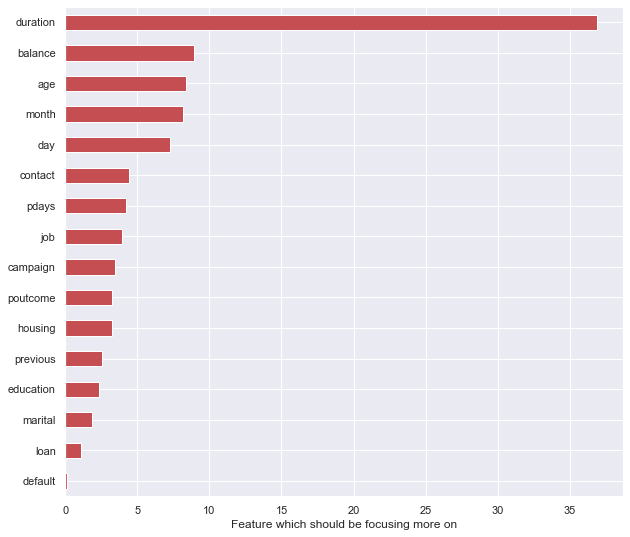

In [41]:
Importance=pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by='Importance', 
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r')
plt.xlabel('Feature which should be focusing more on')
plt.gca().legend_=None

According to Random Forests algorithm, 'last contact duration', 'average yearly balance', 'age' and 'last contact month of the year' features are important.

### Data visualization for customer segmentation

In [42]:
data_initial=pd.read_csv(r'bank.csv')
data_initial.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


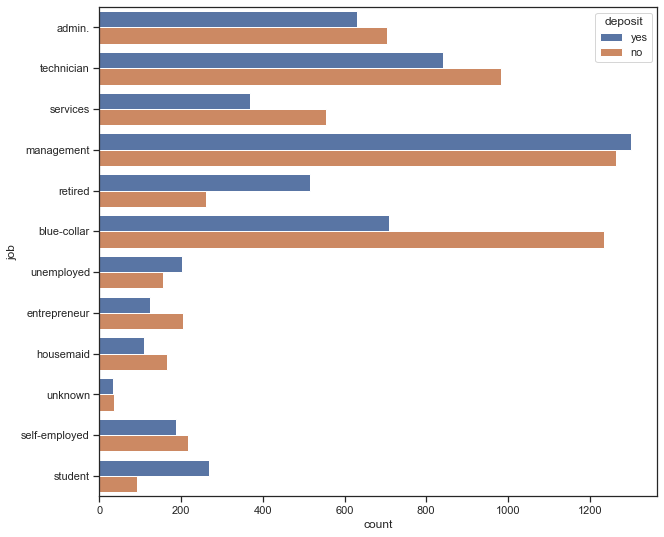

In [43]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job',hue='deposit', data=data_initial);

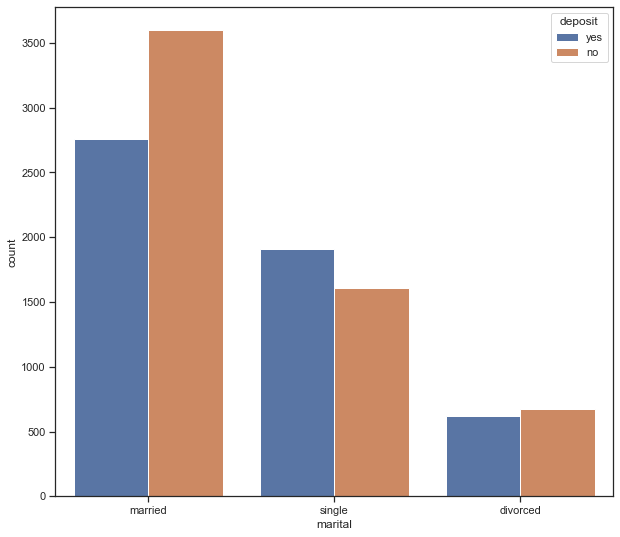

In [44]:
sns.countplot(x='marital',hue='deposit', data=data_initial);

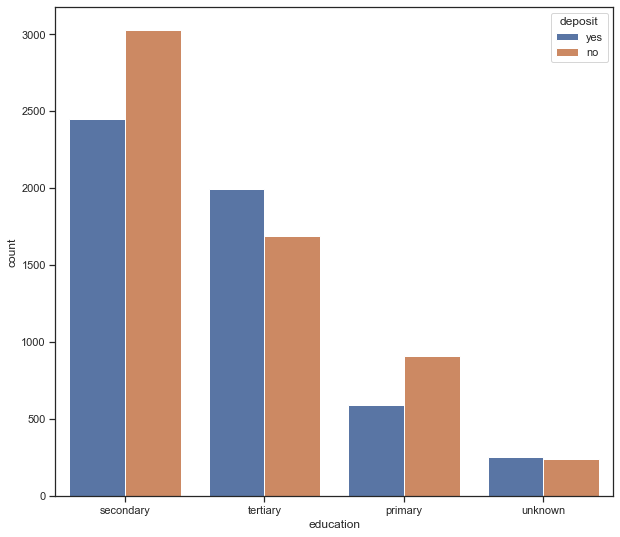

In [45]:
sns.countplot(x='education', hue='deposit',data=data_initial);

In [46]:
data_initial.age.value_counts().head(10)

31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
Name: age, dtype: int64